In [1]:
!python3 --version

Python 3.8.11


In [2]:
import ast
import itertools
import textwrap

import matplotlib.pyplot as plt
import pandas
import seaborn as sns

from utils import plot_simple_comparison

In [3]:
compartment_df = pandas.read_csv('checkpoint_csvs/compartment_dropout_combinations.csv',converters={'Dropout':ast.literal_eval,'Remaining':ast.literal_eval})
compartment_df['Compartments Present']=compartment_df['Remaining'].str.join(' + ')
compartment_df['Mean Percent Replicating']=compartment_df['Mean']

Saved to ../figures/Compartments Present-Mean Percent Replicating-None-None-None.png


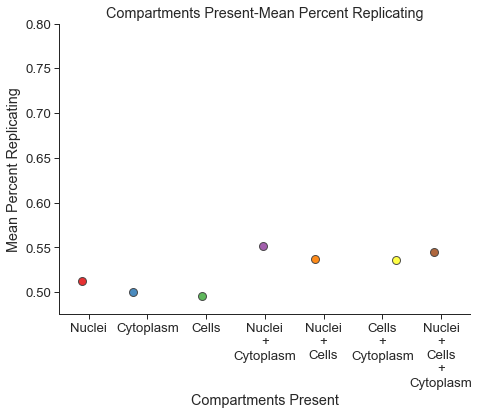

In [4]:
plot_simple_comparison(compartment_df,x='Compartments Present',hue=None,y='Mean Percent Replicating',aspect=1.5, 
order=['Nuclei','Cytoplasm','Cells','Nuclei + Cytoplasm', 'Nuclei + Cells', 'Cells + Cytoplasm','Nuclei + Cells + Cytoplasm'])

In [5]:
def create_and_graph_heatmap(df,col_list,row_list,cmap,title,figsize,xbreaklen=120,ybreaklen=180,xkcd=False):
    full_col_list = []
    full_col_list_for_labels = []
    full_row_list= []
    full_row_list_for_labels = []
    for eachlen in range(len(col_list)+1):
        full_col_list += sorted([str(sorted(x)) for x in list(itertools.combinations(col_list,eachlen))])
        full_col_list_for_labels += sorted([(' + ').join(sorted(x)) for x in list(itertools.combinations(col_list,eachlen))])
    for eachlen in range(len(row_list)+1):
        full_row_list += sorted([str(sorted(x)) for x in list(itertools.combinations(row_list,eachlen))])
        full_row_list_for_labels += sorted([(' + ').join(sorted(x)) for x in list(itertools.combinations(row_list,eachlen))])
    square=pandas.DataFrame(columns=full_col_list,index=full_row_list)
    for _,row in df.iterrows():
        sub_rows=[]
        sub_cols=[]
        for thing in row['Remaining']:
            if thing in col_list:
                sub_cols.append(thing)
            else:
                sub_rows.append(thing)
        sub_rows.sort()
        sub_cols.sort()
        square[str(sub_cols)][str(sub_rows)]=row['Mean']
    square=square.fillna(0)
    
    fig, ax = plt.subplots(figsize=figsize)
    if xkcd:
        cmap=sns.light_palette(cmap,input='xkcd',as_cmap=True)
    g=sns.heatmap(square,cmap=cmap,annot=True)
    xlabels=['None']
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(length=0)
    for label in full_col_list_for_labels[1:]:
        xlabels.append(textwrap.fill(label, width=xbreaklen/len(full_col_list_for_labels),break_long_words=False))
    g.set_xticklabels(xlabels, rotation=0)
    ylabels=['None']
    for label in full_row_list_for_labels[1:]:
        ylabels.append(textwrap.fill(label, width=ybreaklen/len(full_row_list_for_labels),break_long_words=False))
    g.set_yticklabels(ylabels, rotation=0)
    g.set_title(title)
    plt.savefig(f'../figures/{title}.png',dpi=300)
    


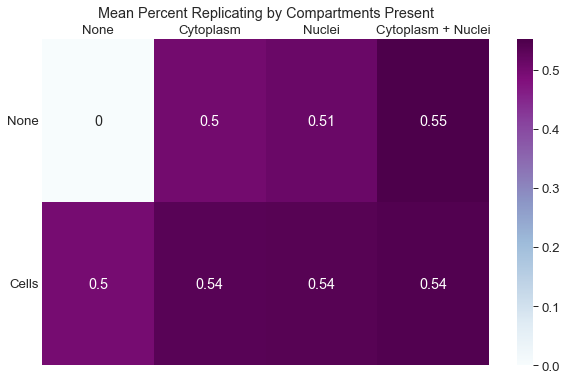

In [6]:
create_and_graph_heatmap(
    pandas.read_csv('checkpoint_csvs/compartment_dropout_combinations.csv',converters={'Dropout':ast.literal_eval,'Remaining':ast.literal_eval}),
    col_list=['Nuclei','Cytoplasm'],row_list=['Cells'],cmap='BuPu',title = 'Mean Percent Replicating by Compartments Present',figsize=(10,6))


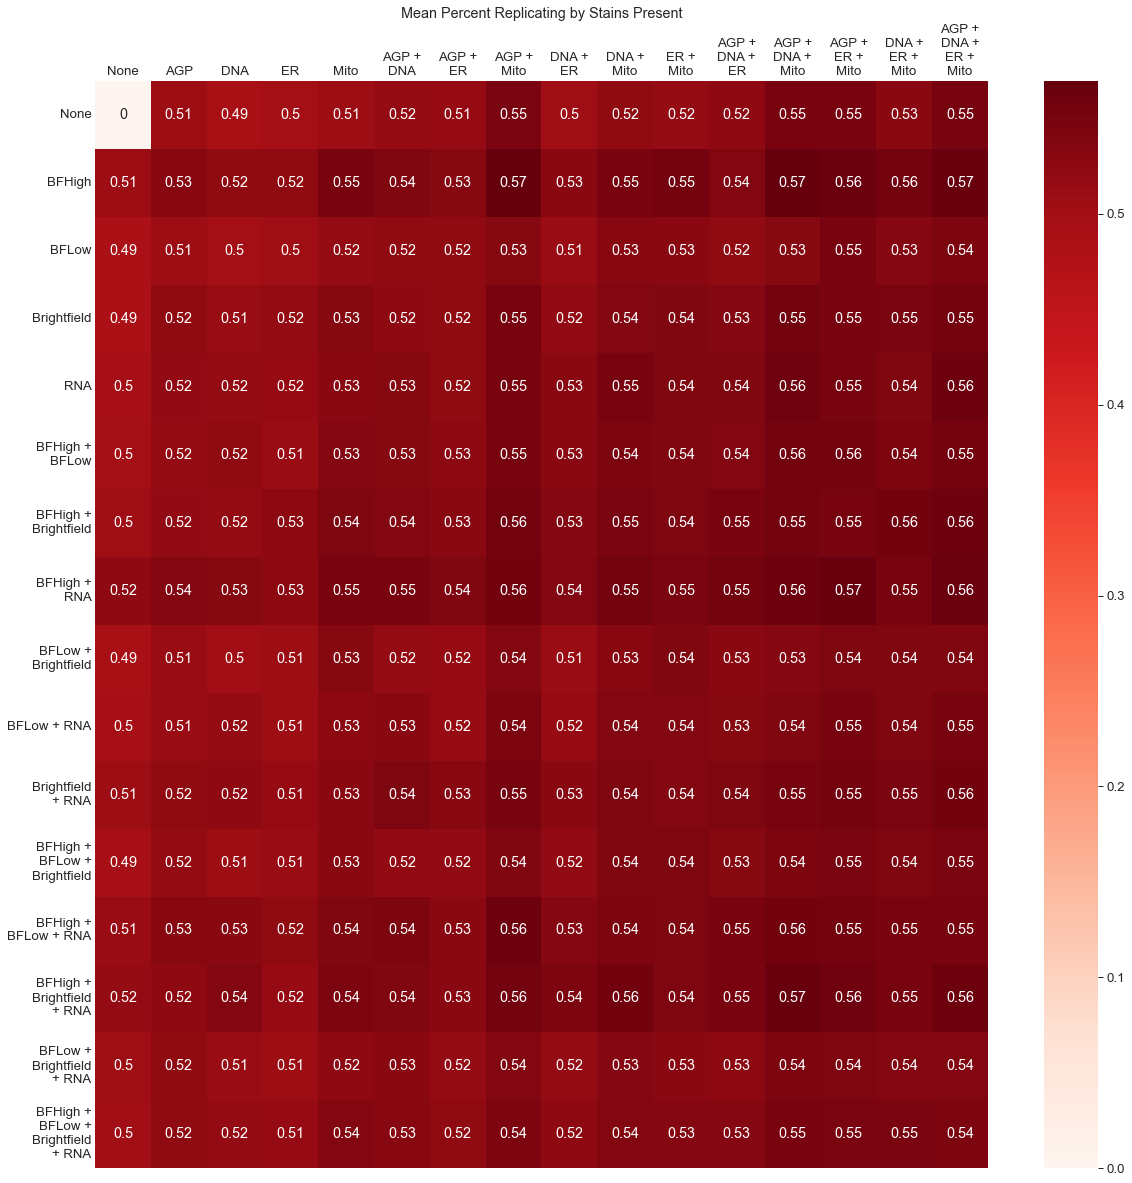

In [7]:
create_and_graph_heatmap(
    pandas.read_csv('checkpoint_csvs/channel_dropout_combinations.csv',converters={'Dropout':ast.literal_eval,'Remaining':ast.literal_eval}),
    col_list=['DNA','ER','AGP','Mito'],row_list=['RNA','Brightfield','BFHigh','BFLow'],cmap='Reds',title = 'Mean Percent Replicating by Stains Present',
    figsize=(20,20),xbreaklen=120)

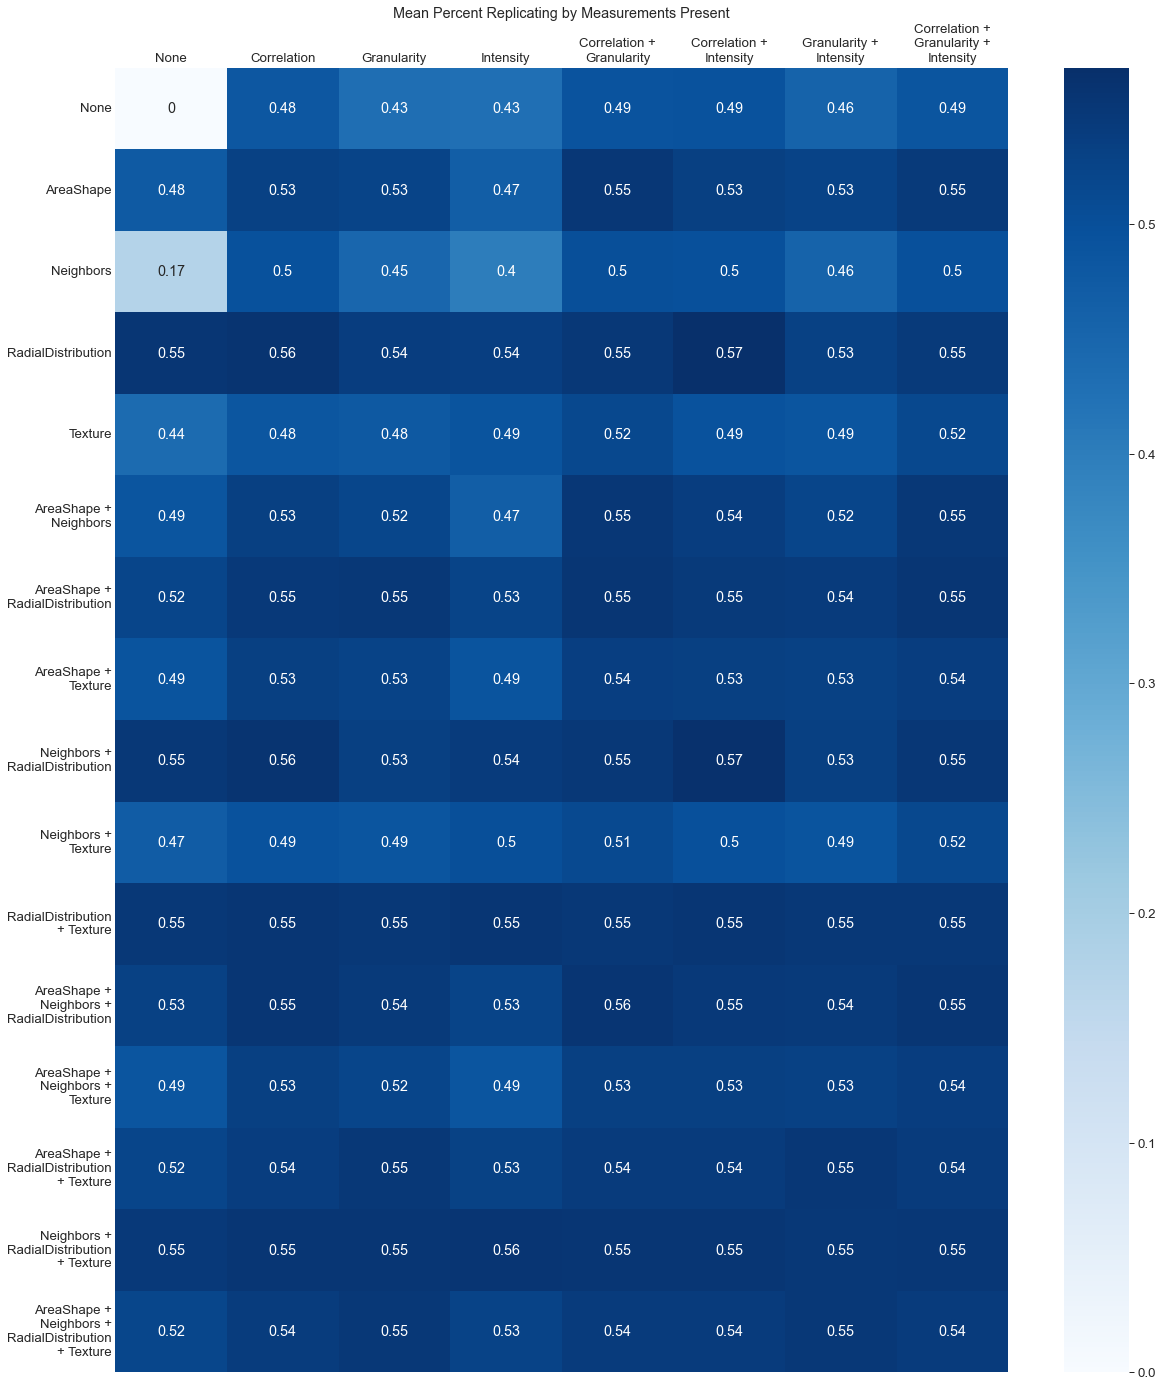

In [8]:
create_and_graph_heatmap(
    pandas.read_csv('checkpoint_csvs/feature_dropout_combinations.csv',converters={'Dropout':ast.literal_eval,'Remaining':ast.literal_eval}),
    col_list=['Correlation','Granularity','Intensity'],row_list=['AreaShape','Neighbors','RadialDistribution','Texture'],cmap='Blues',title = 'Mean Percent Replicating by Measurements Present',
    figsize=(20,24),xbreaklen=180)

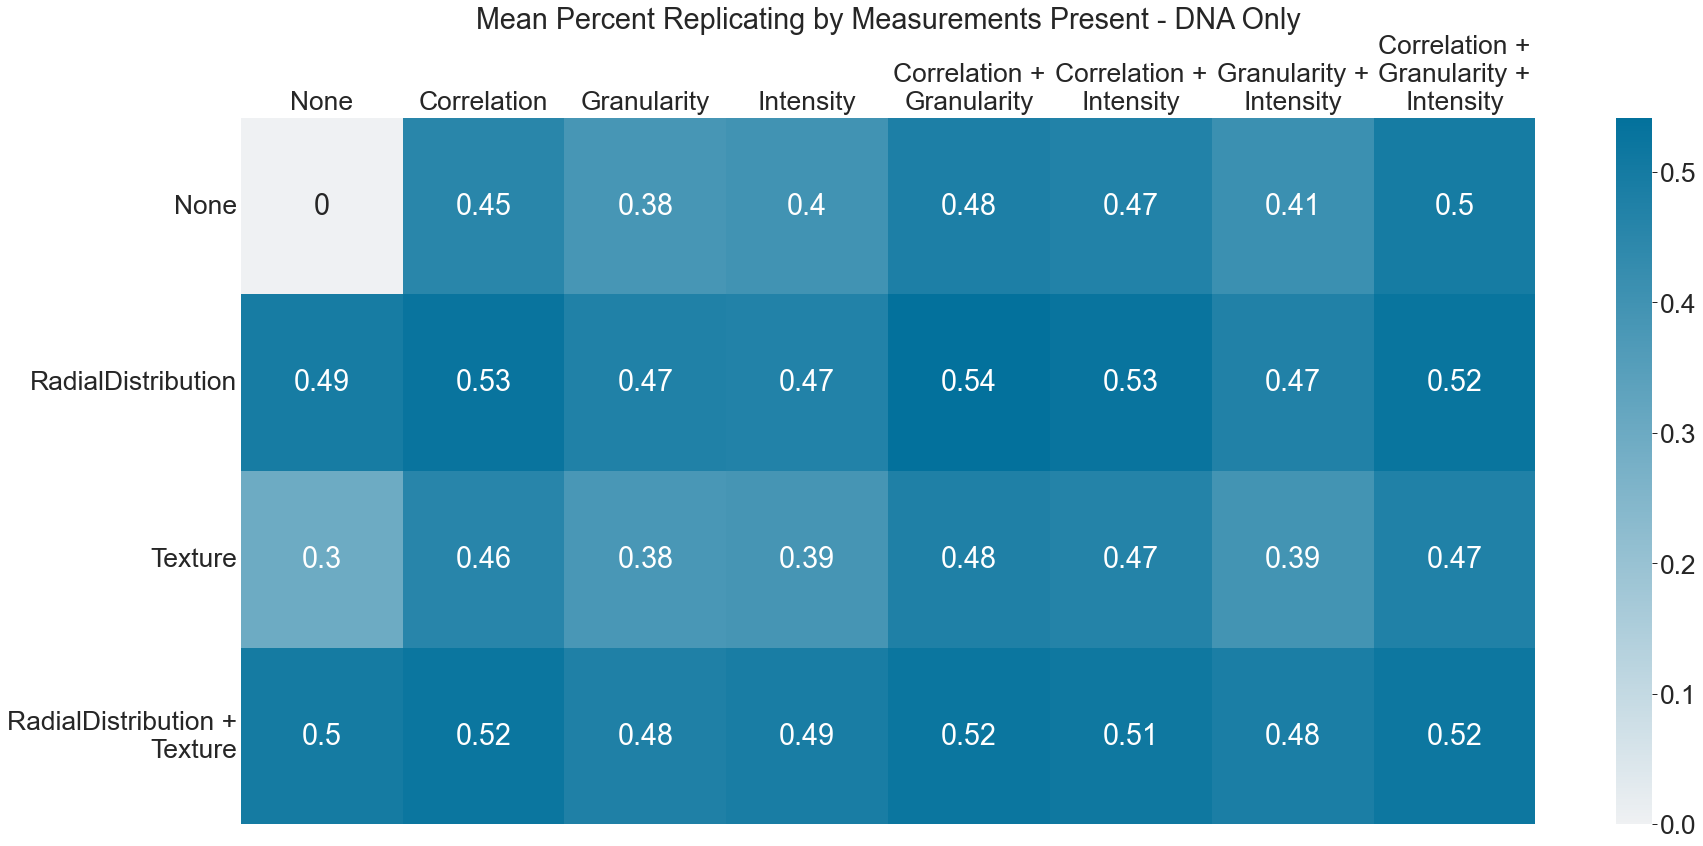

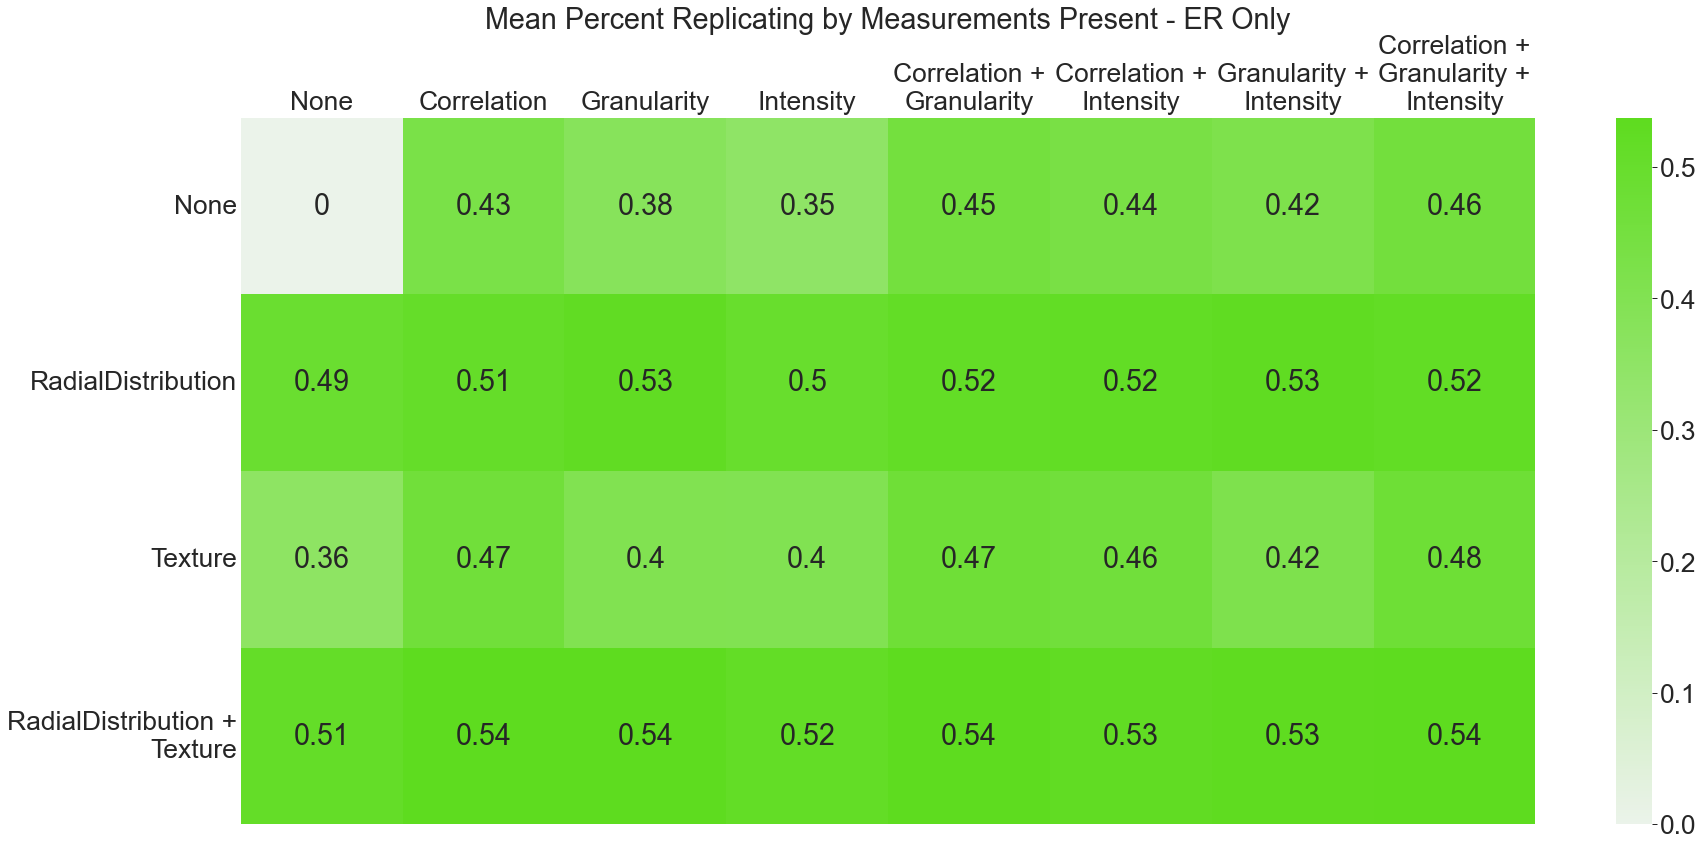

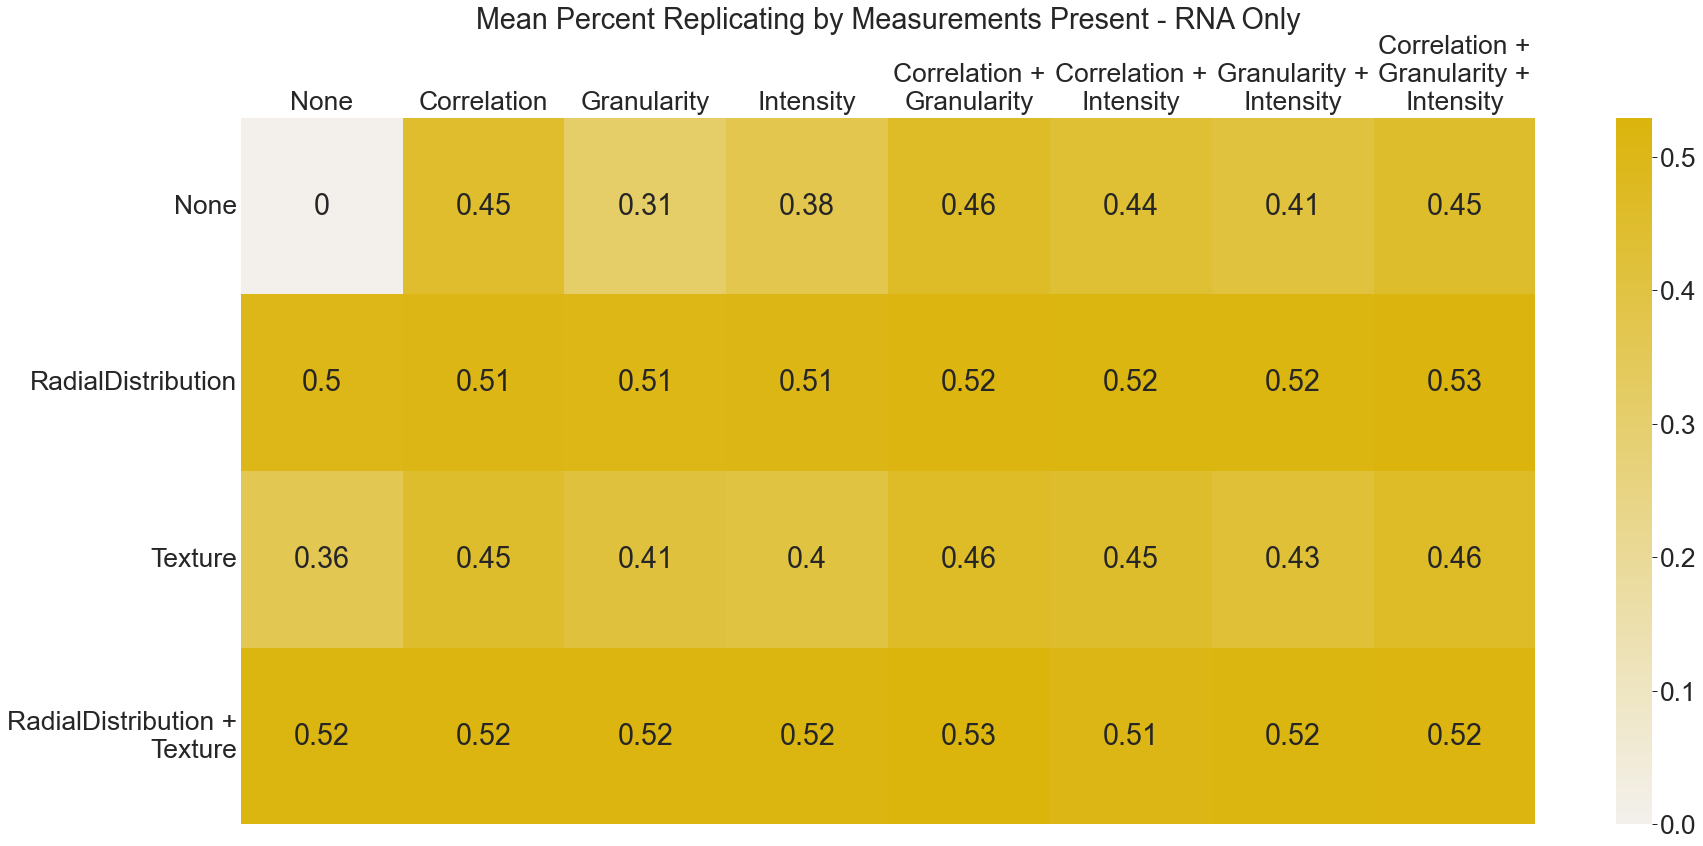

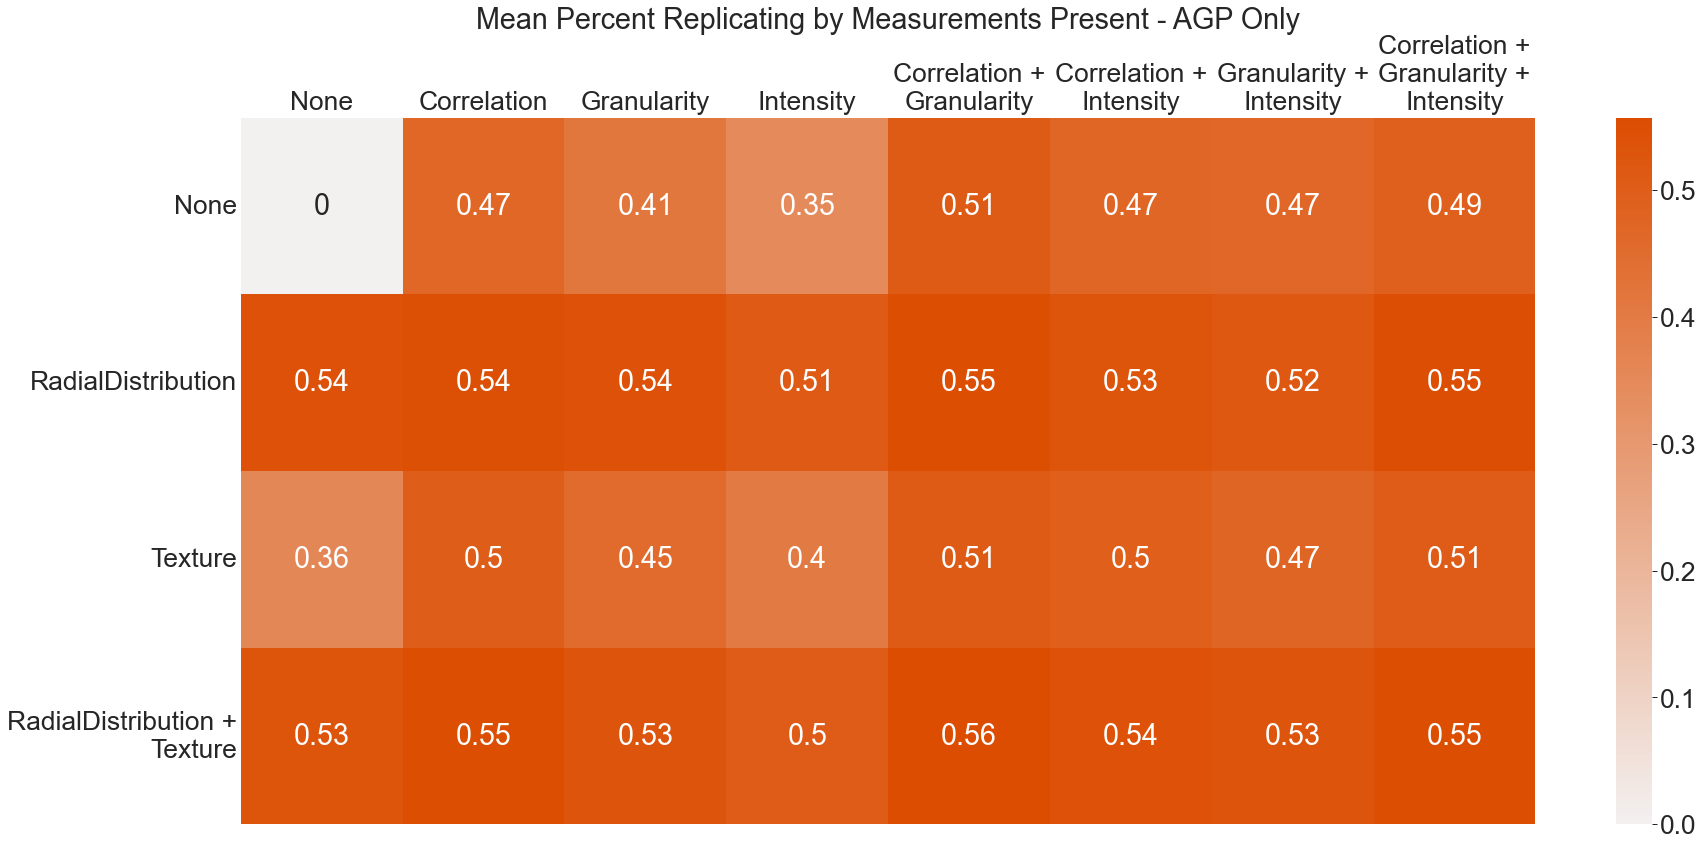

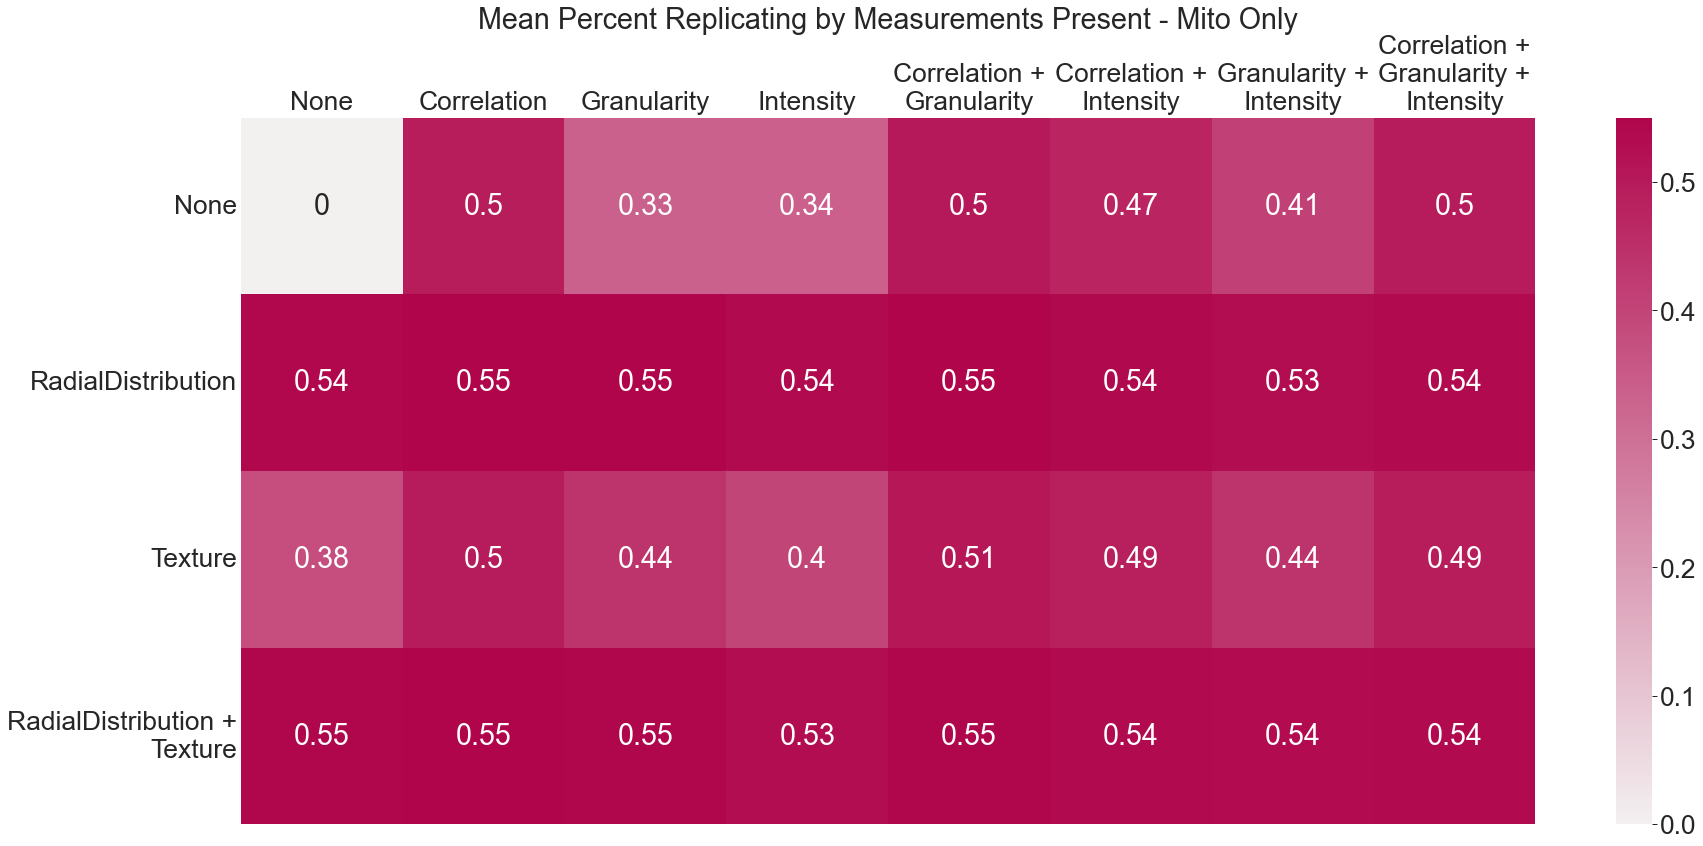

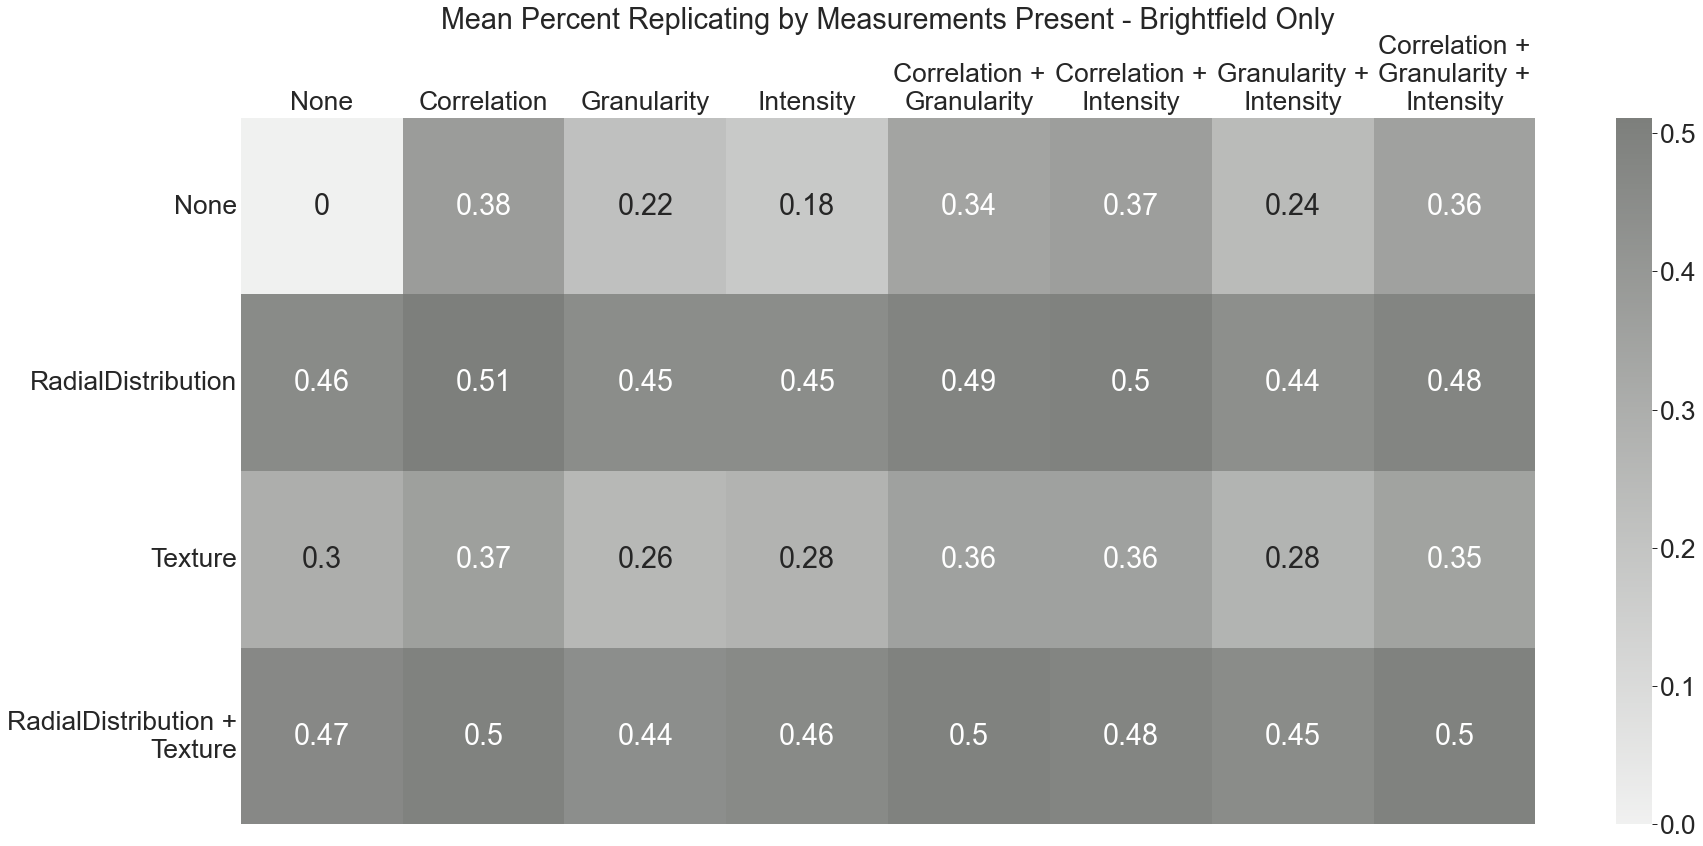

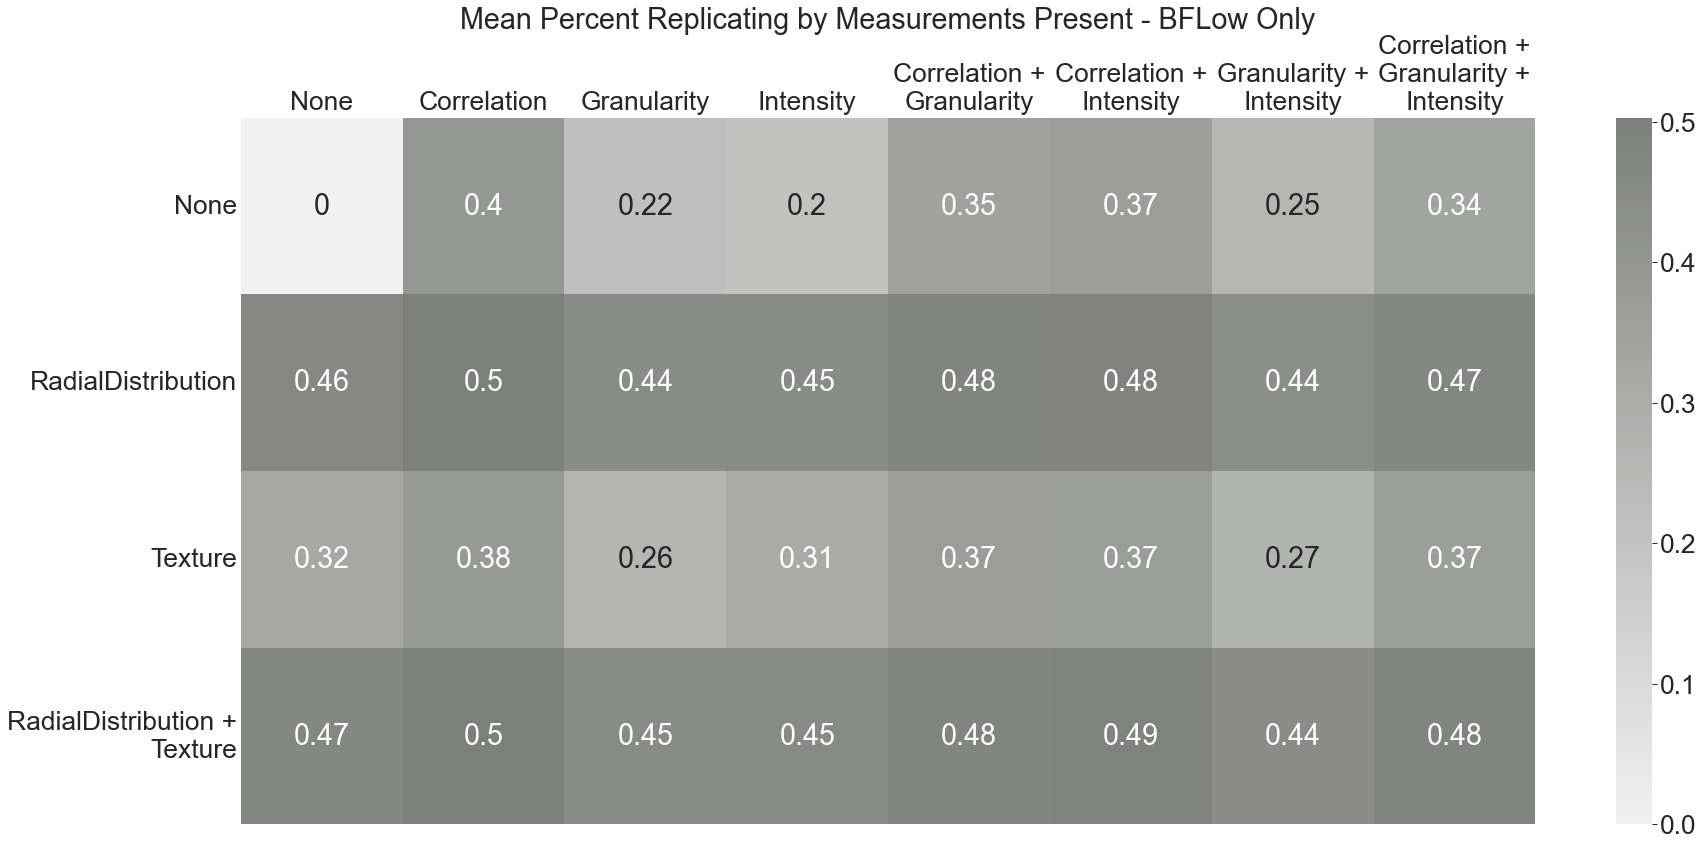

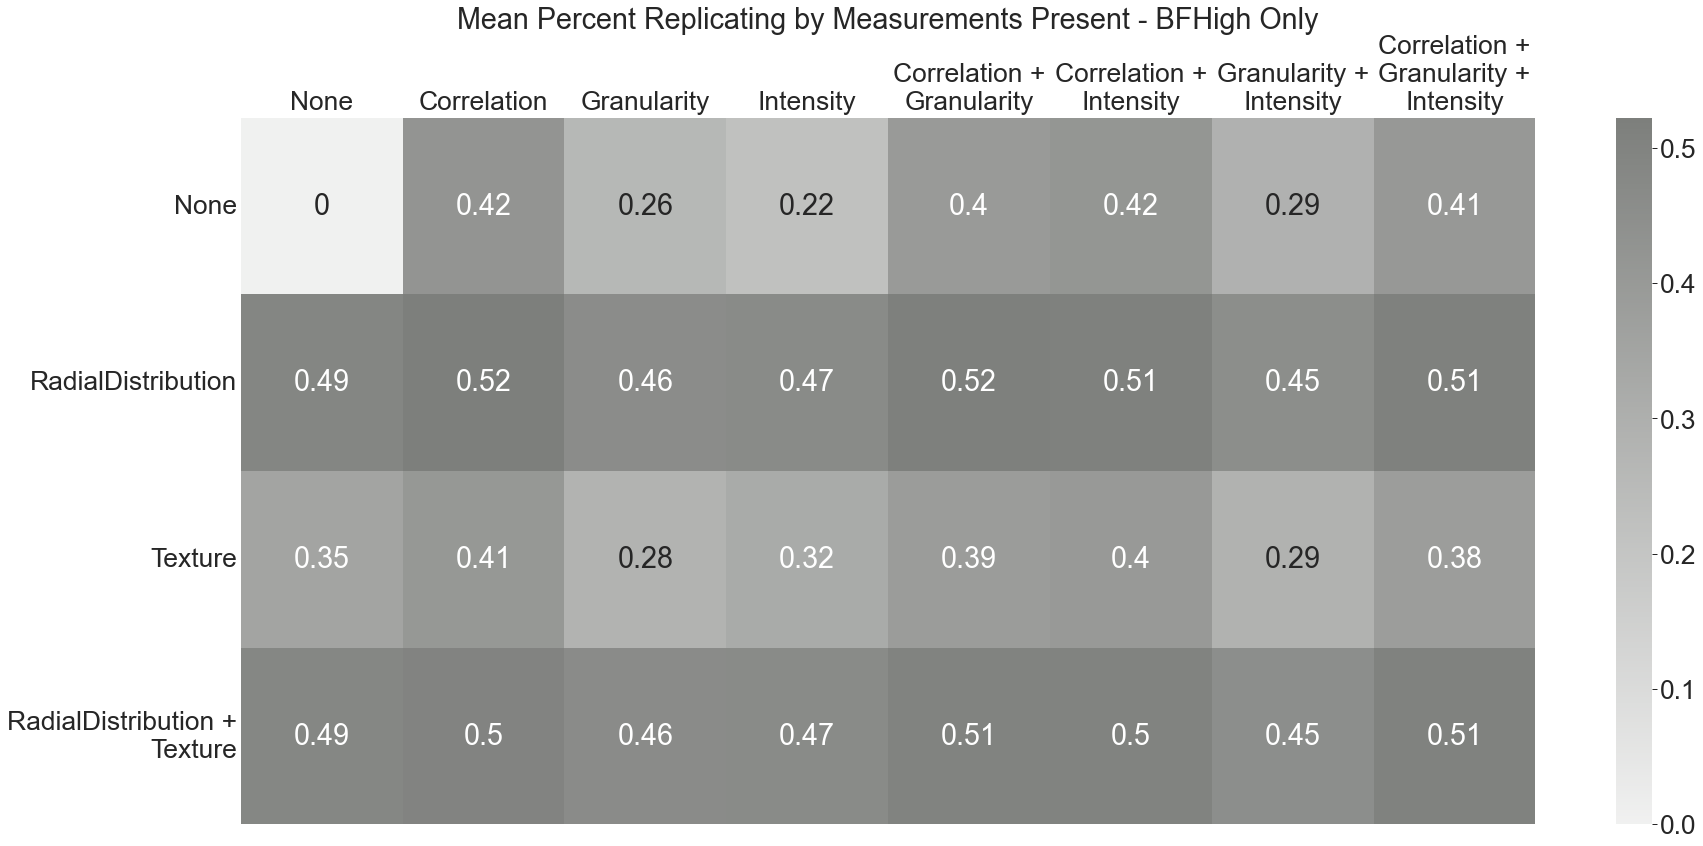

In [14]:
cmap_dict = {'DNA':'ocean blue','ER':'green apple','RNA':'gold',
'AGP':'deep orange','Mito':'purplish red','Brightfield':'medium grey','BFLow':'medium grey','BFHigh':'medium grey'}
for eachchannel in cmap_dict.keys():
    sns.set_context("paper",font_scale=3)
    create_and_graph_heatmap(
    pandas.read_csv(f'checkpoint_csvs/{eachchannel}_only_feature_dropout_combinations.csv',converters={'Dropout':ast.literal_eval,'Remaining':ast.literal_eval}),
    col_list=['Correlation','Granularity','Intensity'],row_list=['RadialDistribution','Texture'],cmap=cmap_dict[eachchannel],title = f'Mean Percent Replicating by Measurements Present - {eachchannel} Only',
    figsize=(29,13),xbreaklen=180,ybreaklen=80,xkcd=True)
    